# Time Series and Forecasting Models: Facebook Prophet

## 1. Introduction

Prophet is an open source library published by Facebook in 2017 which is built upon scikit-learn time series modelling and automatically detects changes in trends by selecting changepoints from the data. It is an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects, and includes automatic detection for all values. 



## 2. Install/import libraries

In [ ]:
!pip install fbprophet
!pip install mplfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 3. Import data

In [ ]:
ftse100_stocks = pd.read_pickle("ftse100_stocks.pkl")

ftse100_stocks.head()

ULVR.L                  ...        BP.L                      
              Open    High     Low  ...       Close   Adj Close    Volume
Date                                ...                                  
2010-01-04  1987.0  2006.0  1981.0  ...  613.599976  323.723907  17956918
2010-01-05  1990.0  1997.0  1942.0  ...  620.099976  327.153046  28352666
2010-01-06  1943.0  1955.0  1935.0  ...  619.400024  326.783966  22054752
2010-01-07  1948.0  1961.0  1926.0  ...  623.299988  328.841431  30630196
2010-01-08  1941.0  1948.0  1917.0  ...  621.700012  327.997284  22458240

[5 rows x 36 columns]

In [ ]:
azn =  ftse100_stocks['AZN.L']
                                     
azn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2912.0,2946.0,2912.0,2941.0,1775.206909,2091679
2010-01-05,2936.0,2949.5,2901.0,2907.5,1754.986084,2869739
2010-01-06,2909.0,2909.0,2850.5,2875.0,1735.368652,3136541
2010-01-07,2879.0,2925.5,2879.0,2910.5,1756.796875,3748200
2010-01-08,2921.0,2927.5,2889.5,2908.5,1755.589600,2473846


In [ ]:
azn['Adj Close']

Date
2010-01-04    1775.206909
2010-01-05    1754.986084
2010-01-06    1735.368652
2010-01-07    1756.796875
2010-01-08    1755.589600
                 ...     
2019-12-20    7592.499512
2019-12-23    7532.210938
2019-12-24    7501.093750
2019-12-27    7531.238281
2019-12-30    7442.750488
Name: Adj Close, Length: 2518, dtype: float64

## 4. Format data for Prophet

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [ ]:
# Create a dataframe that complies with Prophet requirements

prophet_azn_adj = azn[['Adj Close']].copy()

In [ ]:
# Reset the index back so Dates are no longer indexed
prophet_azn_adj.reset_index(inplace=True)

# Rename the columns for use in FB prophet
prophet_azn_adj.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

prophet_azn_adj.head()

,ds,y
0,2010-01-04,1775.206909
1,2010-01-05,1754.986084
2,2010-01-06,1735.368652
3,2010-01-07,1756.796875
4,2010-01-08,1755.589600


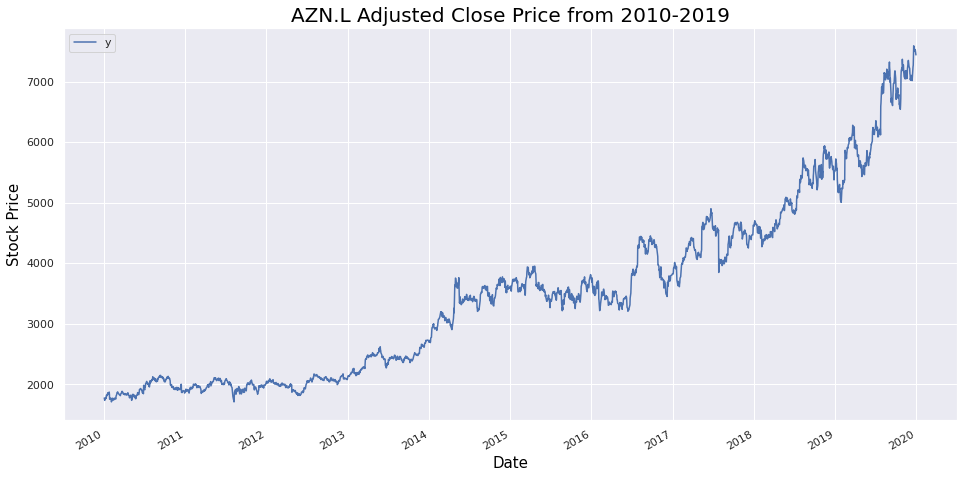

In [ ]:
# Plot Adjusted Close price
pd.plotting.register_matplotlib_converters()
ax = prophet_azn_adj.set_index('ds').plot(figsize=(16,8))
ax.set_title('AZN.L Adjusted Close Price from 2010-2019', color = 'black', fontsize = 20)
ax.set_ylabel('Stock Price', color = 'black', fontsize = 15)
ax.set_xlabel('Date', color = 'black', fontsize = 15)

plt.show()

## 5. Modelling

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

### 5.1 Fit and train the model

Fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor.

In [ ]:
# Instantiate model and pass seasonality setting

m = Prophet(daily_seasonality = True)

Call the fit method and pass in the dataframe of dates and prices.



In [ ]:
# fit the model

m.fit(prophet_azn_adj)

### 5.2 Create future dates to forecast

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe.

In [ ]:
# create a dataframe containing future dates to be forecast 
future = m.make_future_dataframe(periods=730, freq='D')     
future.tail()

,ds
3243,2021-12-25
3244,2021-12-26
3245,2021-12-27
3246,2021-12-28
3247,2021-12-29


### 5.3 Predictions

Forecasting future values in the dataframe containing dates for prediction.

In [ ]:
# Pass the dataframe to the model with dates to predict future values
forecast = m.predict(future)

### Plot Actual vs Predicted prices

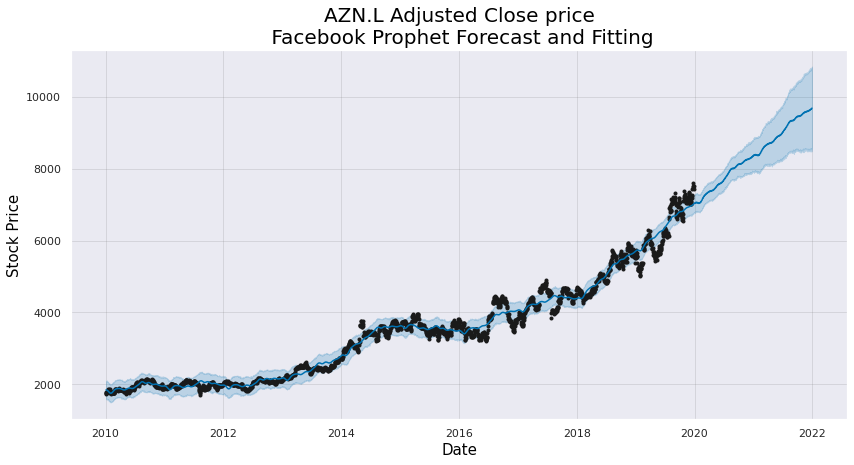

In [ ]:
# Plot Forecast and Actual prices  
m.plot(forecast, uncertainty=True, figsize=(12,6))
plt.title('AZN.L Adjusted Close price\n Facebook Prophet Forecast and Fitting', color = 'black', fontsize = 20)
plt.xlabel("Date", color = 'black', fontsize = 15)
plt.ylabel("Stock Price", color = 'black', fontsize = 15)
plt.show()

In the above plot:
*   Blue line = Forecasted values
*   Black dots = Observed (actual) values
*   Blue-shaded region = Confidence interval


### Trend Changepoints

Time series frequently have abrupt changes in their trajectories. By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately.

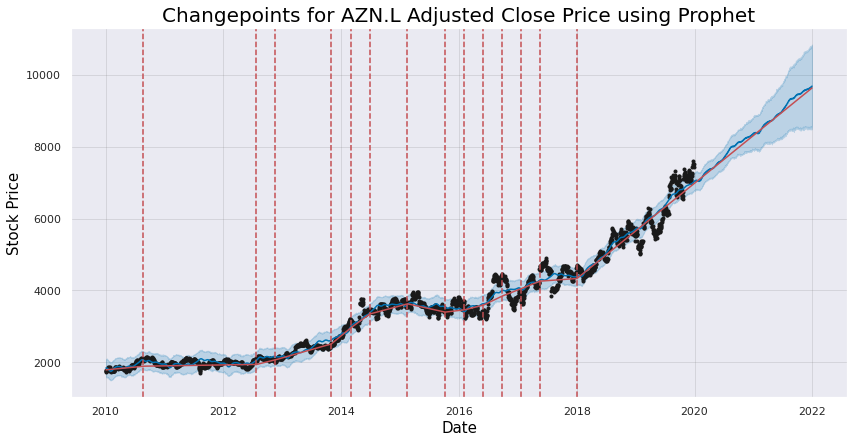

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast, figsize=(12,6))
# the change points are added to our plot 
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.title("Changepoints for AZN.L Adjusted Close Price using Prophet", color = 'black', fontsize = 20)
plt.xlabel("Date", color = 'black', fontsize = 15)
plt.ylabel("Stock Price", color = 'black', fontsize = 15)
plt.show()

By default, Prophet adds 25 changepoints into the initial 80% of the data set. Taking a look at the possible changepoints (dotted red lines) in the above chart, we can see they fit quite well with some of the highs and lows.

### Plot magnitudes of changepoints

Prophet will also let us take a look at the magnitudes of these possible changepoints.

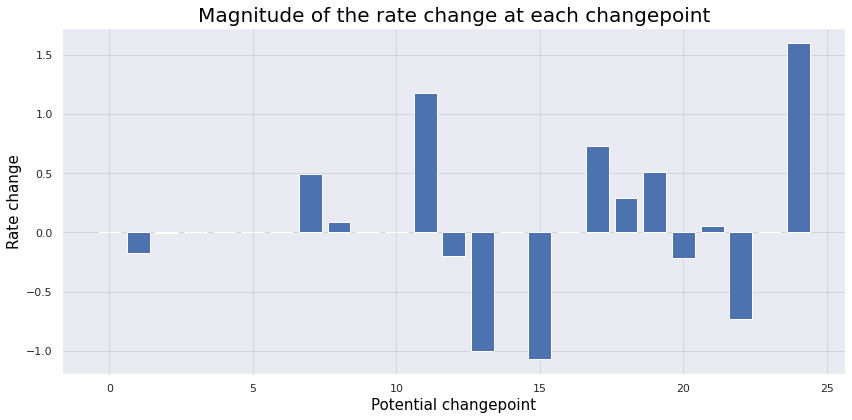

In [ ]:
deltas = m.params['delta'].mean(0) 
fig = plt.figure(facecolor='w', figsize=(12,6))
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
plt.title('Magnitude of the rate change at each changepoint', color = 'black', fontsize = 20)
ax.set_ylabel('Rate change', color = 'black', fontsize = 15)
ax.set_xlabel('Potential changepoint', color = 'black', fontsize = 15)
fig.tight_layout()

We can see that the red dotted lines in the plot of changepoints correspond with plot above of the magnitude of the rate change at each changepoint. Even though we have a lot of places where the rate can possibly change, because of the sparse prior, most of these changepoints go unused.

### Extract changepoints

If we want to use something like this in a model, we need a way of extracting changepoint data.

In [ ]:
# View changepoints

m.changepoints

81     2010-04-29
161    2010-08-23
242    2010-12-15
322    2011-04-11
403    2011-08-09
483    2011-11-30
564    2012-03-27
644    2012-07-25
725    2012-11-16
805    2013-03-13
886    2013-07-10
966    2013-10-31
1047   2014-02-28
1127   2014-06-26
1208   2014-10-20
1288   2015-02-16
1369   2015-06-15
1449   2015-10-06
1530   2016-02-03
1610   2016-05-31
1691   2016-09-22
1771   2017-01-17
1852   2017-05-15
1932   2017-09-06
2013   2018-01-02
Name: ds, dtype: datetime64[ns]

### Plot components of the forecasts

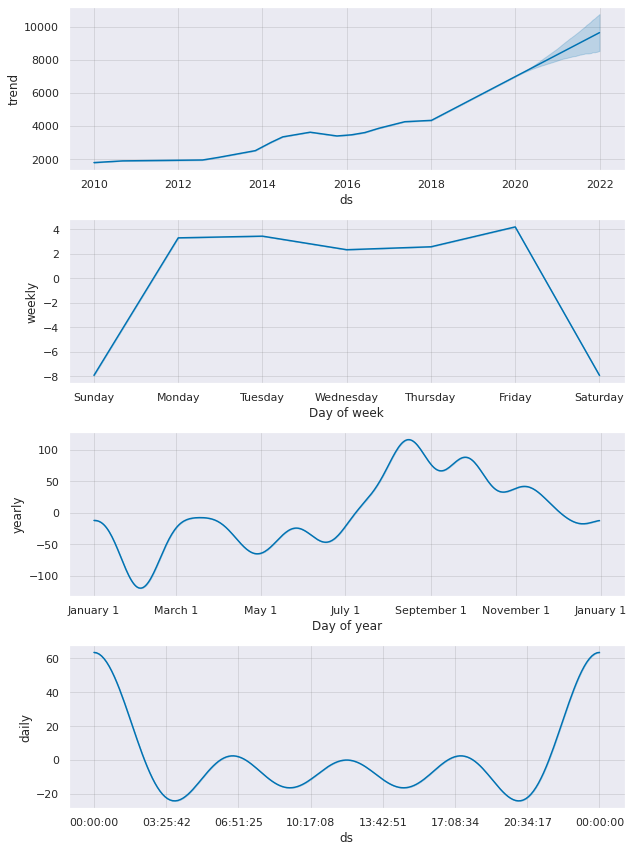

In [ ]:
# Plot the trend, weekly, yearly and daily components

m.plot_components(forecast)
plt.show()

Our data has some seasonal information present. Based on the estimated trends, we can see from the yearly subplot that, usually, the stock price is highest in mid-August and, according to the weekly subplot, mostly on Fridays. Inevitably, the daily subplot shows that the stock price fluctuates throughout the day.

Finally, the trend subplot shows an upward trend including an increase in the stock price between mid 2020 and beginning of 2022). The dataset only contained data up to the end of 2019 so this prediction does not reflect any impact of Covid-19.